In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import path

In [2]:
os.chdir(path.path)

# [Overview of Training Data](#section-title)

In [29]:
training_data = pd.read_csv("train.csv")
print(training_data.head())
print(training_data.shape, training_data["feature_1"].nunique(),training_data["feature_2"].nunique(),training_data["feature_3"].nunique())
training_data.describe()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [34]:
training_data.groupby(["feature_1", "feature_2", "feature_3"]).agg({"target":np.mean}).reset_index()

,feature_1,feature_2,feature_3,target
0,1,1,0,-0.225825
1,1,2,0,-0.304027
2,1,3,0,-0.543918
3,2,1,0,-0.409331
4,2,2,0,-0.302688
5,2,3,0,-0.310319
6,3,1,1,-0.266980
7,3,2,1,-0.296476
8,3,3,1,-0.569006
9,4,1,0,-0.413791


## Annual variation of target by month
* Maybe exclude months with small card count: Initial phases
* There is clear difference in loyalty between users acquired over different months

In [107]:
training_data_agg_by_month = training_data.groupby("first_active_month").agg({"card_id":np.count_nonzero, 
                                                                              "target": np.mean}).reset_index()
training_data["month"] = training_data["first_active_month"].apply(lambda x: int(x[5:7]))

print(training_data_agg_by_month[training_data_agg_by_month["card_id"]>1000])
print(training_data.groupby("month").agg({"card_id": np.count_nonzero, "target": np.mean}).reset_index())

   first_active_month  card_id    target
42            2015-06     1104 -0.659533
43            2015-07     1393 -0.584633
44            2015-08     1376 -1.215491
45            2015-09     1494 -0.370241
46            2015-10     1532 -0.789381
47            2015-11     1582 -0.594212
48            2015-12     2343 -0.500749
49            2016-01     1711 -0.681889
50            2016-02     1636 -0.705629
51            2016-03     2005 -0.678806
52            2016-04     2938 -0.400349
53            2016-05     3314 -0.477909
54            2016-06     4102 -0.653428
55            2016-07     4188 -0.575884
56            2016-08     4977 -0.477697
57            2016-09     4410 -0.601538
58            2016-10     5371 -0.479385
59            2016-11     7222 -0.581667
60            2016-12     9403 -0.646919
61            2017-01     9605 -0.661516
62            2017-02     8110 -0.647769
63            2017-03     8271 -0.616756
64            2017-04     8761 -0.498424
65            20

In [82]:
lower_quant, upper_quant = training_data["target"].quantile(0.025), training_data["target"].quantile(0.975)
training_data_excluding_outliers = training_data.loc[training_data["target"].between(lower_quant, upper_quant)]
training_data.shape, training_data_excluding_outliers.shape

((201917, 6), (191821, 6))

## features vs loyalty score:
* feature_1: loyalty socre decreases with increase in feature_1
* feature_2:
* feature_3:

In [94]:
def target_dist_by_feature(df, feature, entire_df = training_data):
    print(entire_df.groupby(feature).agg({"target":np.mean}).reset_index(), "\n")
    print(sns.boxplot(x = feature, y = "target", data=df))
    g = sns.FacetGrid(df, col=feature)
    print(g.map(plt.hist, "target"))

   feature_1    target
0          1 -0.315476
1          2 -0.350452
2          3 -0.377533
3          4 -0.404652
4          5 -0.499879 

AxesSubplot(0.125,0.125;0.775x0.755)


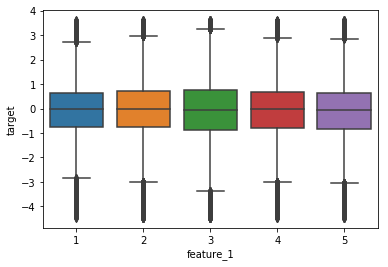

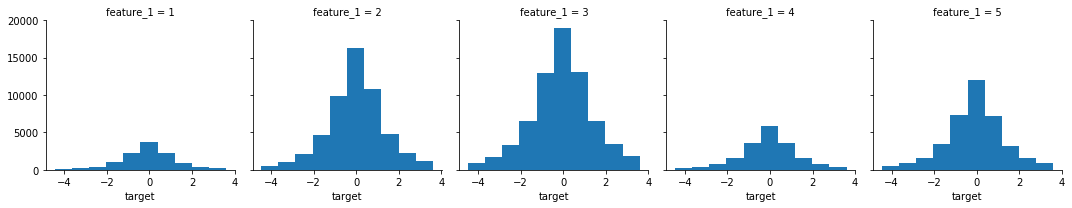

In [95]:
target_dist_by_feature(training_data_excluding_outliers, "feature_1")

   feature_2    target
0          1 -0.398675
1          2 -0.332899
2          3 -0.501889 

AxesSubplot(0.125,0.125;0.775x0.755)


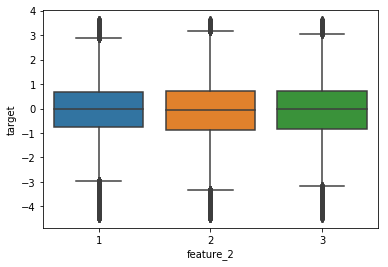

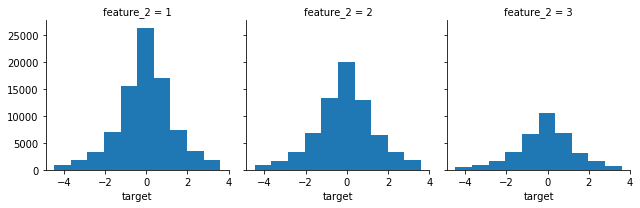

In [96]:
target_dist_by_feature(training_data_excluding_outliers, "feature_2")

   feature_3    target
0          0 -0.357939
1          1 -0.421057 

AxesSubplot(0.125,0.125;0.775x0.755)


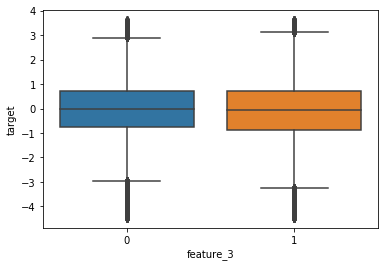

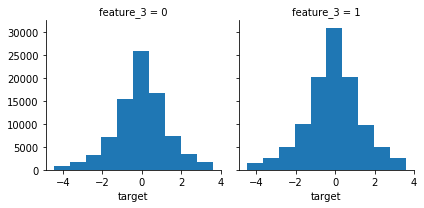

In [97]:
target_dist_by_feature(training_data_excluding_outliers, "feature_3")